# Fire Detection-Week 1
## Step 1: Importing Libraries
This is the first step in the fire detection project. Below, we import the necessary Python Libraries.

The libraries used include NumPY, Pandas, Scikit-learn,XGBoost, and visualization tools.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import  accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

## Step 2: Loading and Combining the Dataset
We are loading fire data from MODIS for the years 2021, 2022, and 2023. Each CSV file is loaded into a separate data frame, and then all are concatenated into one combined data frame.

In [10]:
# Load the datasets
df1 = pd.read_csv('modis_2021_India.csv')
df2 = pd.read_csv('modis_2022_India.csv')
df3 = pd.read_csv('modis_2023_India.csv')

#Preview each dataset
df1.head() # print first 5 rows - df1.tail()
df2.head()
df3.head()

#Combine all datasets
df = pd.concat([df1, df2, df3], ignore_index=True)

#Preview combined dataset
df.head()

#Check dataset shape and info
df.shape #rows nd columns
df.info() # dt,memc


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300959 entries, 0 to 300958
Data columns (total 15 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   latitude    300959 non-null  float64
 1   longitude   300959 non-null  float64
 2   brightness  300959 non-null  float64
 3   scan        300959 non-null  float64
 4   track       300959 non-null  float64
 5   acq_date    300959 non-null  object 
 6   acq_time    300959 non-null  int64  
 7   satellite   300959 non-null  object 
 8   instrument  300959 non-null  object 
 9   confidence  300959 non-null  int64  
 10  version     300959 non-null  float64
 11  bright_t31  300959 non-null  float64
 12  frp         300959 non-null  float64
 13  daynight    300959 non-null  object 
 14  type        300959 non-null  int64  
dtypes: float64(8), int64(3), object(4)
memory usage: 34.4+ MB


> Debug cell (optional): Used to list files in the working directory.

In [7]:
import os
os.getcwd()

'C:\\Users\\JASMIN'

In [11]:
# Any missing values?
df.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

## Step 3: Initial Dataset Checks
Checking for duplicates and inspecting dataset columns to understand the structure.

In [12]:
df.duplicated().sum()


np.int64(111267)

In [13]:
df=df.drop_duplicates()

In [14]:
df.duplicated().sum()


np.int64(0)

# Step 4: List out all the column names to check.

In [17]:
df.columns


Index(['latitude', 'longitude', 'brightness', 'scan', 'track', 'acq_date',
       'acq_time', 'satellite', 'instrument', 'confidence', 'version',
       'bright_t31', 'frp', 'daynight', 'type'],
      dtype='object')

## Step 5: Summary Statistics
Using .describe() to understand the distribution of numerical features.

In [15]:
df.describe().T # statistics of dataset - numbers!

,count,mean,std,min,25%,50%,75%,max
latitude,189692.0,23.814983,4.899227,8.1362,20.960900,23.73640,27.411625,34.5620
longitude,189692.0,81.436394,6.576674,68.5295,75.969175,79.51075,85.111150,97.1044
brightness,189692.0,323.702708,14.083953,300.0000,314.700000,322.10000,330.400000,505.7000
scan,189692.0,1.421846,0.629685,1.0000,1.000000,1.20000,1.500000,4.8000
track,189692.0,1.152942,0.201304,1.0000,1.000000,1.10000,1.200000,2.0000
acq_time,189692.0,819.539116,347.938913,321.0000,650.000000,756.00000,825.000000,2202.0000
confidence,189692.0,63.890101,18.184031,0.0000,54.000000,65.00000,76.000000,100.0000
version,189692.0,28.768835,27.084777,6.0300,6.030000,6.03000,61.030000,61.0300
bright_t31,189692.0,303.500227,8.179678,267.2000,298.300000,302.60000,309.100000,400.1000
frp,189692.0,27.370187,78.369407,0.0000,8.800000,13.60000,24.600000,6961.8000


## Step 6: Target Variable Distribution
Checking the value counts for the target variable type to understand class imbalance.

In [18]:
# Check Unique values of target variable
df.type.value_counts()

type
0    180553
2      9113
3        26
Name: count, dtype: int64

## Step 7: Exploratory Data Analysis (EDA)
Looking at the unique values in each categorical column to better understand the data.

In [19]:
# Check unique and n unique for all categorical features
for col in df.columns:
  if df[col].dtype == 'object':
    print(f"Column: {col}")
    print(f"Unique values: {df[col].unique()}")
    print(f"Number of unique values: {df[col].nunique()}")
    print("-" * 50)

Column: acq_date
Unique values: ['01-01-2021' '02-01-2021' '03-01-2021' '04-01-2021' '05-01-2021'
 '06-01-2021' '07-01-2021' '08-01-2021' '09-01-2021' '10-01-2021'
 '11-01-2021' '12-01-2021' '13-01-2021' '14-01-2021' '15-01-2021'
 '16-01-2021' '17-01-2021' '18-01-2021' '19-01-2021' '20-01-2021'
 '21-01-2021' '22-01-2021' '23-01-2021' '24-01-2021' '25-01-2021'
 '26-01-2021' '27-01-2021' '28-01-2021' '29-01-2021' '30-01-2021'
 '31-01-2021' '01-02-2021' '02-02-2021' '03-02-2021' '04-02-2021'
 '05-02-2021' '06-02-2021' '07-02-2021' '08-02-2021' '09-02-2021'
 '10-02-2021' '11-02-2021' '12-02-2021' '13-02-2021' '14-02-2021'
 '15-02-2021' '16-02-2021' '17-02-2021' '18-02-2021' '19-02-2021'
 '20-02-2021' '21-02-2021' '22-02-2021' '23-02-2021' '24-02-2021'
 '25-02-2021' '26-02-2021' '27-02-2021' '28-02-2021' '01-03-2021'
 '02-03-2021' '03-03-2021' '04-03-2021' '05-03-2021' '06-03-2021'
 '07-03-2021' '08-03-2021' '09-03-2021' '10-03-2021' '11-03-2021'
 '12-03-2021' '13-03-2021' '14-03-2021' '15-

## Step 8: Visualizing Target Distribution
Plotting the distribution of fire types to visualize class frequency.

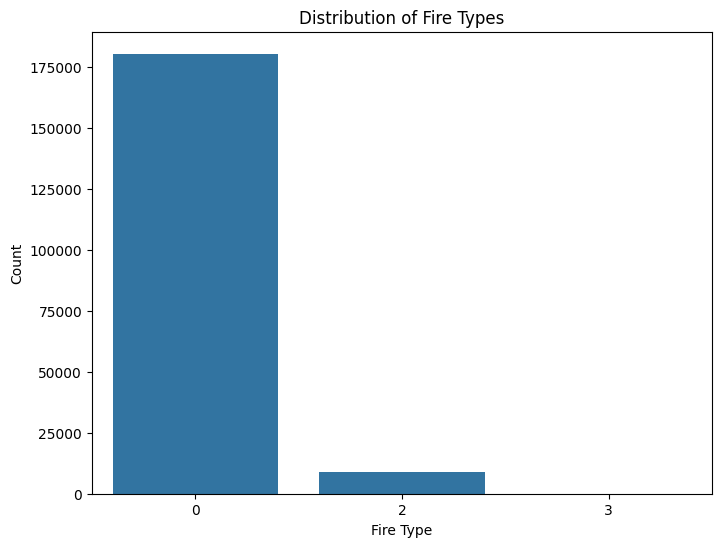

In [20]:
# Count plot for 'type'
plt.figure(figsize=(8, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Fire Types')
plt.xlabel('Fire Type')
plt.ylabel('Count')
plt.show()

1.The count plot shows the distribution of different fire types in the dataset.

2.It is evident that 'MODIS' is the most frequent fire type, followed by 'VIIRS'.

3.The 'type' variable appears to be unbalanced, with 'MODIS' having significantly more observations than 'VIIRS'. This imbalance might need to be considered during model training.

## Step 9: Distribution of Confidence
Visualizing how the confidence feature is distributed. This helps understand how confident the fire detection system is in its observations.

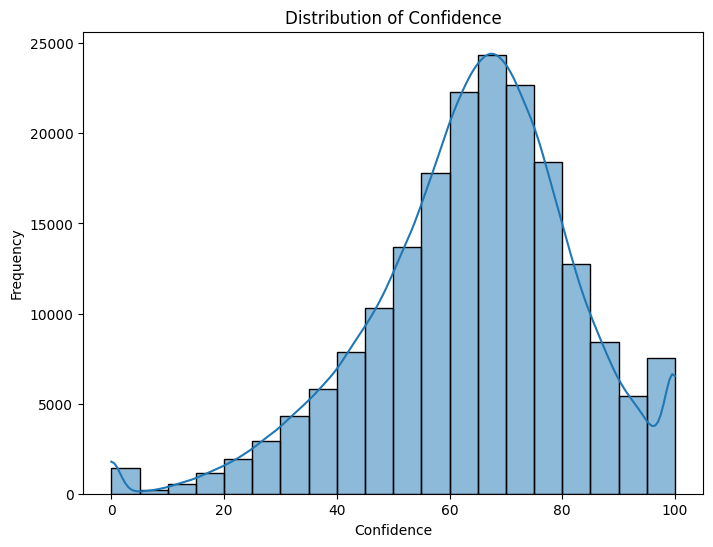

In [21]:
# Histogram of 'confidence'
plt.figure(figsize=(8, 6))
sns.histplot(df['confidence'], bins=20, kde=True)
plt.title('Distribution of Confidence')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.show()

The histogram illustrates the distribution of the 'confidence' feature.

- The distribution appears *bimodal*, with peaks around low and high confidence.
- There are *fewer observations* in the mid-range of confidence.
- This suggests the fire detection system tends to assign *either low or high confidence*, rarely medium values.